In [1]:
%matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns



import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf

import geopandas as gpd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# # Define running mean functions
# def rnMean(data,meanWidth):
#     return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
# def rnTime(t,meanWidth):
#     return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 

# Kommunalt

In [3]:
# Get deaths data
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

df = pd.read_csv(latestdir+'/Kommunalt_DB/07_bekraeftede_tilfaelde_pr_dag_pr_kommune.csv',encoding='latin1',delimiter=';')
df['Dato'] = pd.to_datetime(df['Dato'])
df.columns

Index(['Kommune', 'Kommunenavn', 'Dato', 'Bekræftede tilfælde i alt'], dtype='object')

(0.0, 6320.95)

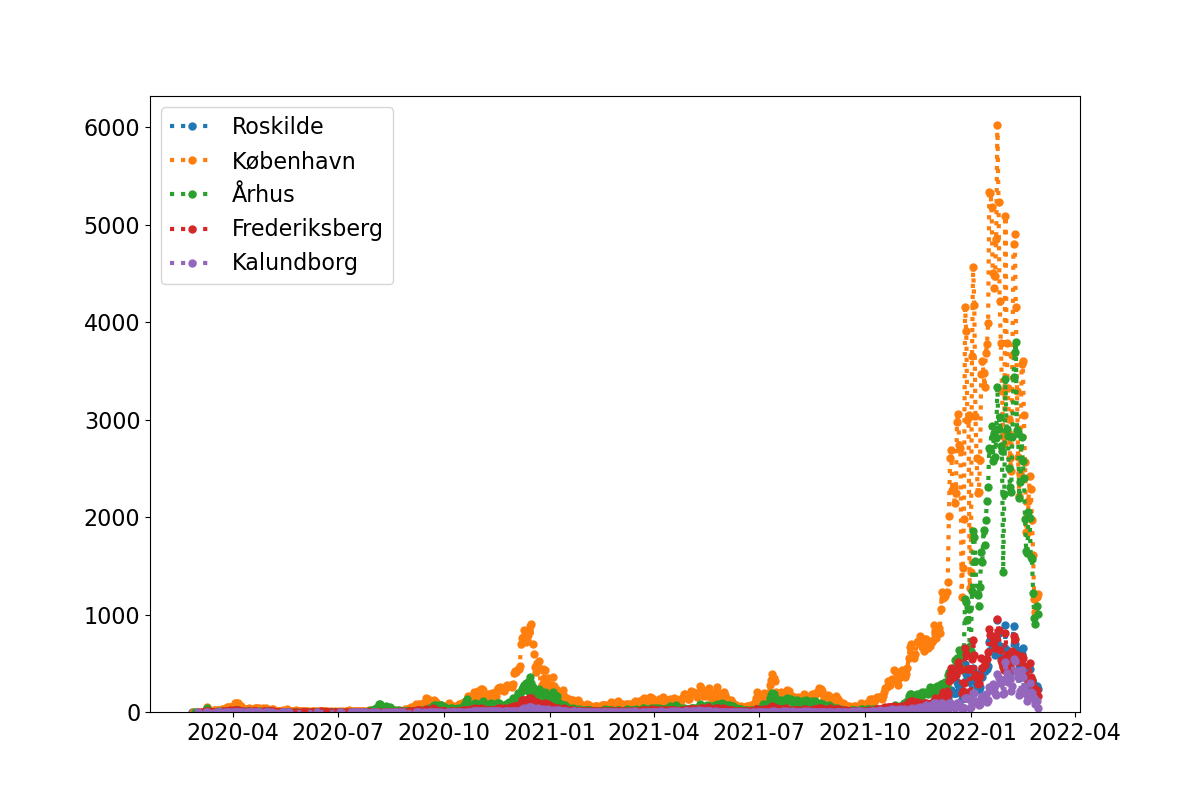

In [4]:
# As a test, plot time-series
df.columns
dfKom = df.groupby(['Kommunenavn','Dato']).sum()

plt.figure() 

k = 0
allKommune = df.Kommunenavn.unique()
# for k in range(len(allKommune)):
for k in range(5):
    curKomNavn = allKommune[k]
    curdf = dfKom.loc[curKomNavn]
    curDates = curdf.index

    # plt.plot(curDates,curdf['Døde'],label=curRegion)
    # plt.plot(pf.rnTime(curDates),pf.rnMean(curdf['Døde']),label=curRegion)
    # plt.plot(pf.rnTime(curDates),pf.rnMean(curdf['Indlæggelser']),label=curRegion)
    # plt.plot(pf.rnTime(curDates),pf.rnMean(curdf['Bekræftede tilfælde i alt']),label=curKomNavn)
    plt.plot(curDates,curdf['Bekræftede tilfælde i alt'],'.:',label=curKomNavn)

plt.legend()
plt.ylim(bottom=0)

In [5]:
# Get map-data
gdf = gpd.read_file(rootdir_data+'Kommune\\Kommune.shp')

# Only use most recent mapdata
gdf = gdf[gdf.til == np.max(gdf.til.unique())]

In [35]:
def getPointsWithin(geometry,N):
    x_min, y_min, x_max, y_max = geometry.bounds

    # generate random data within the bounds
    x = np.random.uniform(x_min, x_max, N*2)
    y = np.random.uniform(y_min, y_max, N*2)

    # convert them to a points GeoSeries
    gdf_points = gpd.GeoSeries(gpd.points_from_xy(x, y))
    # only keep those points within polygons
    gdf_points = gdf_points[gdf_points.within(geometry)]

    while (len(gdf_points) < N):
        
        # generate random data within the bounds
        # x = np.random.uniform(x_min, x_max,N)
        # y = np.random.uniform(y_min, y_max,N)
        x = np.random.uniform(x_min, x_max,N)
        y = np.random.uniform(y_min, y_max,N)

        # w = x_max-x_min
        # h = y_max-y_min
        # x_mid = (x_max+x_min)/2
        # y_mid = (y_max+y_min)/2
        # x = np.random.uniform(0,w,N) + x_mid
        # y = np.random.uniform(0,h,N) + y_mid

        # convert them to a points GeoSeries
        gdf_points_new = gpd.GeoSeries(gpd.points_from_xy(x, y))
        # only keep those points within polygons
        gdf_points_new = gdf_points_new[gdf_points_new.within(geometry)]

        gdf_points = pd.concat([gdf_points,gdf_points_new])


    return gdf_points.iloc[:N]

# curIndex = 16

# curPoints = getPointsWithin(gdf.iloc[curIndex].geometry,100)

# fig,ax = plt.subplots()

# gdf.plot(ax=ax,color='k')
# curPoints.plot(ax=ax)


In [45]:
def getGeo(curKom):
    if (curKom == 'Aabenraa'):
        curKom = 'Åbenrå'
    if (curKom == 'Nordfyn'):
        curKom = 'Nordfyns'
    if (curKom == 'København'):
        curKom = 'Københavns'
    if (curKom == 'Bornholm'):
        curKom = 'Bornholms'
    if (curKom == 'Faaborg-Midtfyn'):
        curKom = 'Fåborg-Midtfyn'
    if (curKom == 'Lyngby-Taarbæk'):
        curKom = 'Lyngby-Tårbæk'

    curgdf = gdf[gdf.navn == (curKom+' Kommune')]
    return curgdf

,objectid,navn,enhedid,fra,til,enhedtype,art,SHAPE_Leng,SHAPE_Area,geometry
16,24960.0,Københavns Kommune,121006.0,2007-01-01,9999-12-31,64.0,Kommune,154225.005507,9.028113e+07,MULTIPOLYGON Z (((734617.242 6179376.682 0.000...


In [121]:
curKom = 'Holbæk'

allDates = df.Dato.unique()


allPoints = []

# for k in range(0,len(allDates)):
for k in range(0,len(allDates)-100):
    curDate = allDates[k]   
    thisdf = df.loc[(df.Dato==curDate) & (df.Kommunenavn == curKom)]
    if (len(thisdf) > 0):
        curCount = thisdf.iloc[0]['Bekræftede tilfælde i alt']
        curkomgdf = getGeo(curKom)
        pointsToShow = getPointsWithin(curkomgdf.iloc[0].geometry,curCount)

        allPoints.append(pointsToShow)
    else:
        allPoints.append([None])
        # print(len(thisdf)) 
# allPoints
    # thisdf

[[None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 0    POINT (671338.919 6183502.344)
 dtype: geometry,
 2    POINT (670127.374 6164734.667)
 0    POINT (677211.656 6186375.054)
 dtype: geometry,
 0    POINT (658728.215 6174825.473)
 dtype: geometry,
 [None],
 [None],
 [None],
 [None],
 [None],
 1    POINT (666693.376 6174468.241)
 3    POINT (669423.287 6160702.675)
 dtype: geometry,
 [None],
 [None],
 [None],
 1    POINT (669469.484 6173020.570)
 0    POINT (655364.900 6169811.217)
 dtype: geometry,
 0    POINT (660387.950 6168346.917)
 dtype: geometry,
 0    POINT (662028.063 6170885.795)
 dtype: geometry,
 [None],
 0    POINT (674202.574 6162613.451)
 2    POINT (670929.212 6181711.923)
 dtype: geometry,
 1    POINT (670468.784 6177595.203)
 2    POINT (668752.784 6183591.360)
 0    POINT (675747.227 6160170.683)
 0    POINT (662168.795 6163011.880)
 dtype: geometry,
 0    POINT (670950.841 6164789.043)
 1    POINT (655719.454 6172555.162)
 

In [ ]:
# np.concatenate(allPoints[:20])
# allPoints[:20]

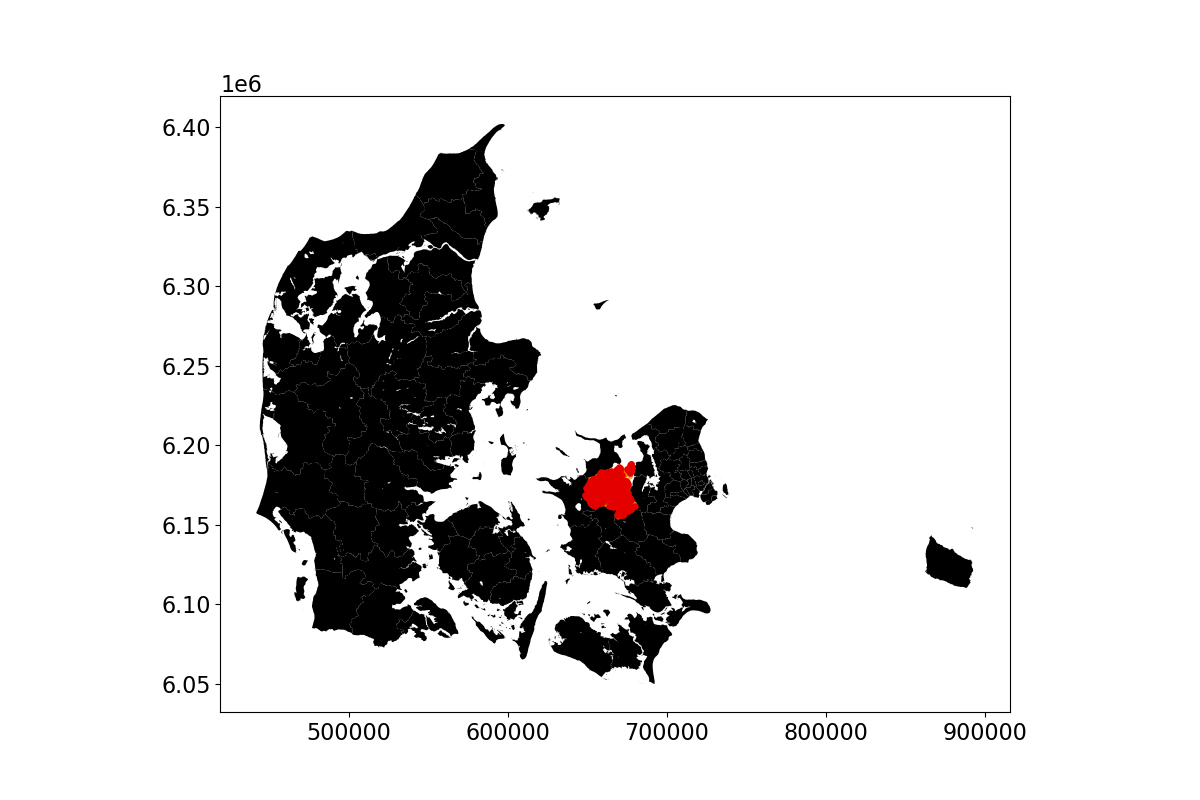

In [124]:
fig,ax = plt.subplots() 

gdf.plot(ax=ax,color='k')

curDateIndex = len(allDates)-100

# allPoints[-1].plot(ax=ax,color='b')
for x in allPoints[:curDateIndex-30]:
    if (type(x) != list):
        x.plot(ax=ax,color='xkcd:yellow',alpha=0.2,markersize=4) 
        
for x in allPoints[curDateIndex-30:curDateIndex-7]:
    if (type(x) != list):
        x.plot(ax=ax,color='xkcd:orange',alpha=0.5,markersize=8) 
        
for x in allPoints[curDateIndex-7:]:
    if (type(x) != list):
        x.plot(ax=ax,color='xkcd:red',alpha=1,markersize=14) 

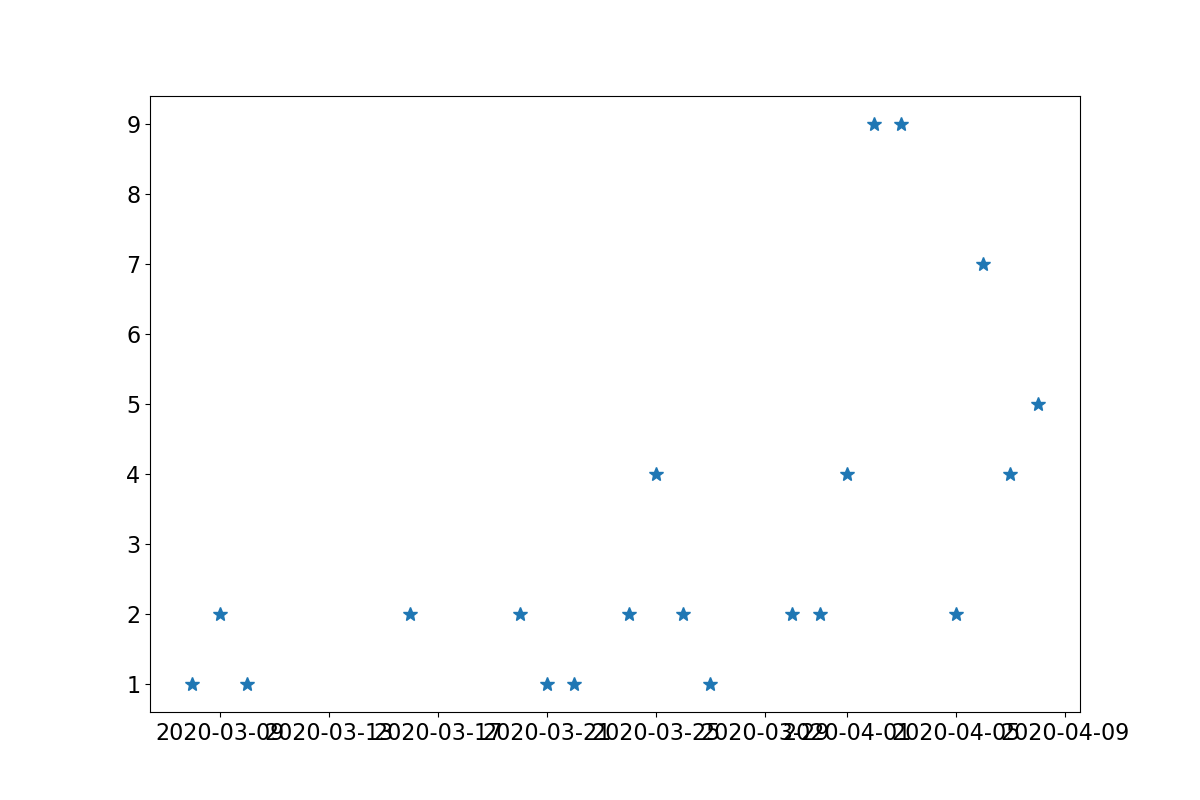

In [113]:

plt.figure() 

asdf = df[df.Kommunenavn == 'Holbæk'].iloc[0:20]
plt.plot(asdf.Dato,asdf['Bekræftede tilfælde i alt'],'*')

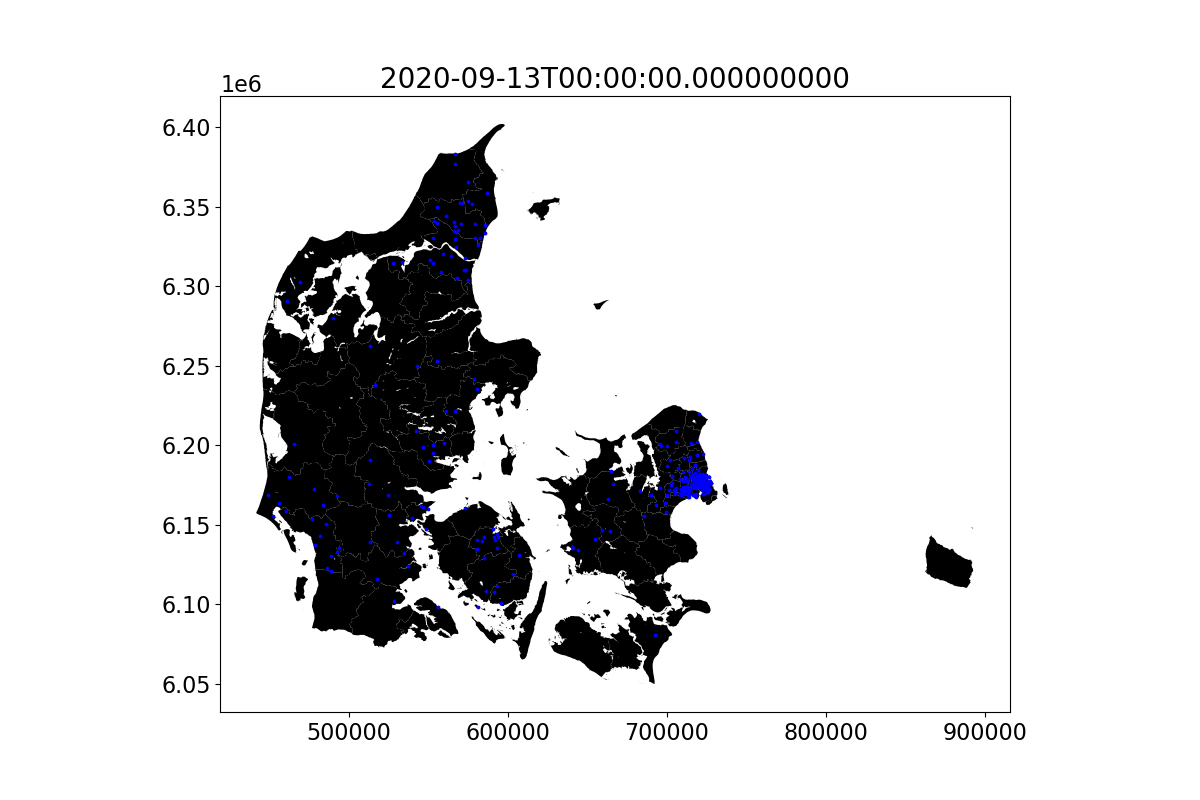

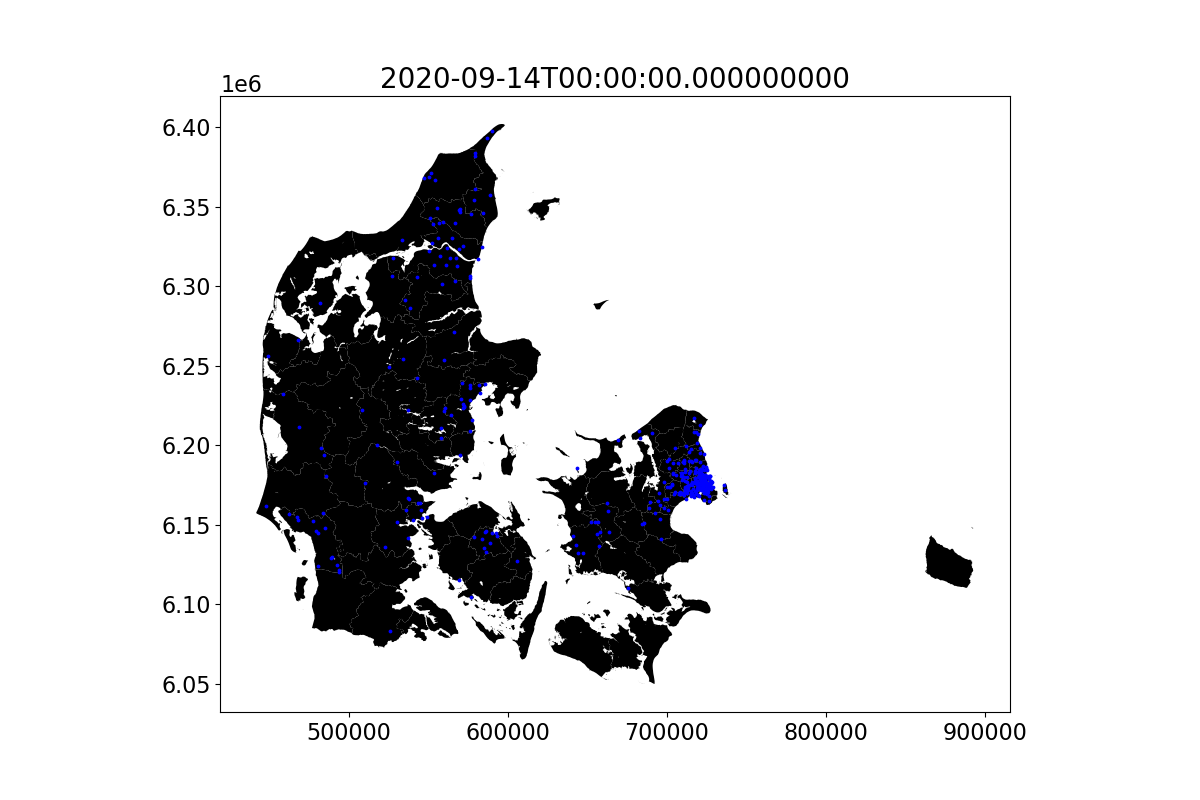

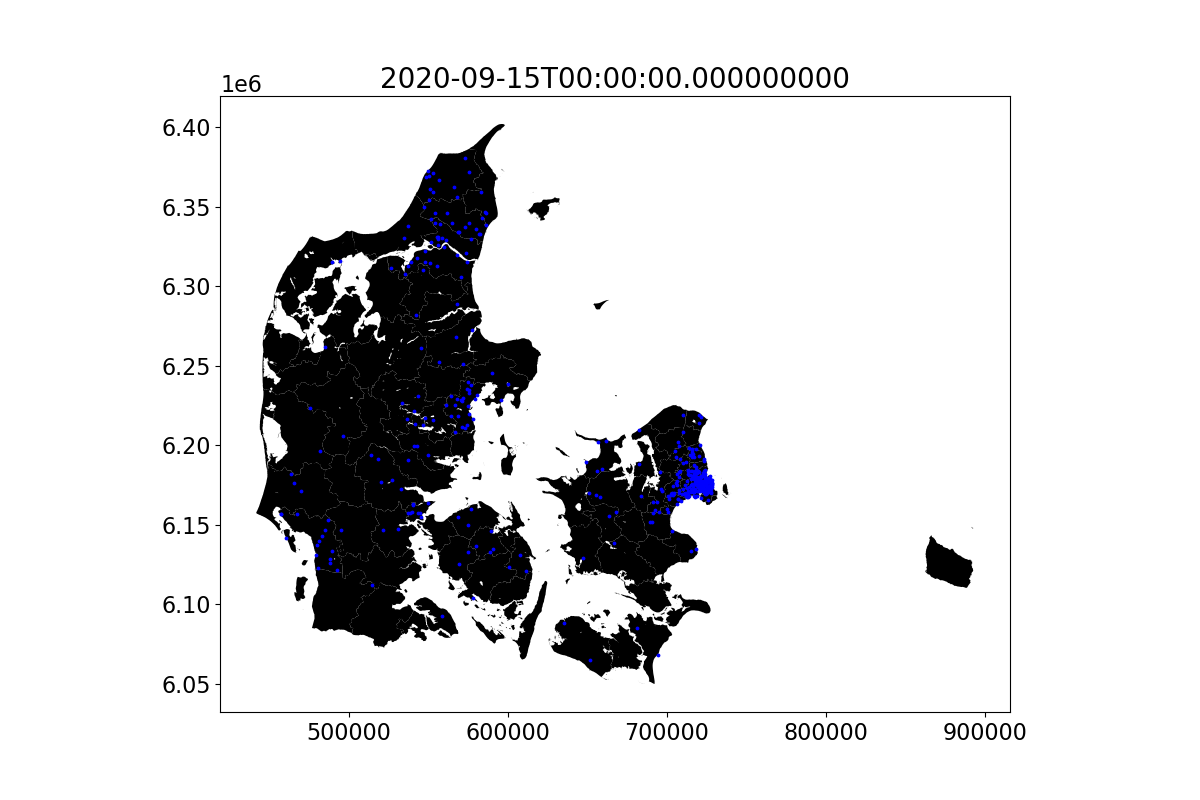

In [59]:
allDates = df.Dato.unique()


for k in range(199,202):
    curDate = allDates[k]

    dfDate = df[df.Dato==curDate]

    fig,ax = plt.subplots() 

    gdf.plot(ax=ax,color='k')

    for i in range(len(dfDate)):
        curKom = dfDate.iloc[i].Kommunenavn
        curCount = dfDate.iloc[i]['Bekræftede tilfælde i alt']
        # print(f'{curKom}: {curCount}')

        curkomgdf = getGeo(curKom)
        pointsToShow = getPointsWithin(curkomgdf.iloc[0].geometry,curCount)
        pointsToShow.plot(ax=ax,color='b',markersize=3)

    ax.set_title(curDate)

In [ ]:

    # curgdf.plot(ax=ax1,color=curColor)

In [28]:
# curCenter = gdfCurKom.geometry.centroid
# curCenter.x
# gdf

In [36]:
# gdfCurKom =  gdf.iloc[17]
# x_min, y_min, x_max, y_max = gdfCurKom.geometry.bounds

# # set sample size
# n = 1000
# # generate random data within the bounds
# x = np.random.uniform(x_min, x_max, n)
# y = np.random.uniform(y_min, y_max, n)

# w = x_max-x_min
# h = y_max-y_min
# x_mid = (x_max+x_min)/2
# y_mid = (y_max+y_min)/2
# curCenter = gdfCurKom.geometry.centroid
# x_mid = curCenter.x
# y_mid = curCenter.y
# x = np.random.uniform(-w/3,w/3,n) + x_mid
# y = np.random.uniform(-h/3,h/3,n) + y_mid

# # convert them to a points GeoSeries
# gdf_points = gpd.GeoSeries(gpd.points_from_xy(x, y))
# # # only keep those points within polygons
# # gdf_points = gdf_points[gdf_points.within(gdfCurKom)]
# gdf_points = gdf_points[gdf_points.within(gdfCurKom.geometry)]

# fig,ax = plt.subplots()
# gdf.plot(ax=ax,color='k')
# gdf_points.plot(ax=ax)

# Regionalt

In [3]:
# Get deaths data
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

df = pd.read_csv(latestdir+'/Regionalt_DB/03_bekraeftede_tilfaelde_doede_indlagte_pr_dag_pr_koen.csv',encoding='latin1',delimiter=';')
df['Prøvetagningsdato'] = pd.to_datetime(df['Prøvetagningsdato'])
df.columns

Index(['Region', 'Prøvetagningsdato', 'Køn', 'Bekræftede tilfælde i alt',
       'Døde', 'Indlæggelser', 'Kummuleret antal døde',
       'Kummuleret antal bekræftede tilfælde',
       'Kummuleret antal indlæggelser'],
      dtype='object')

(0.0, 21.299999999999997)

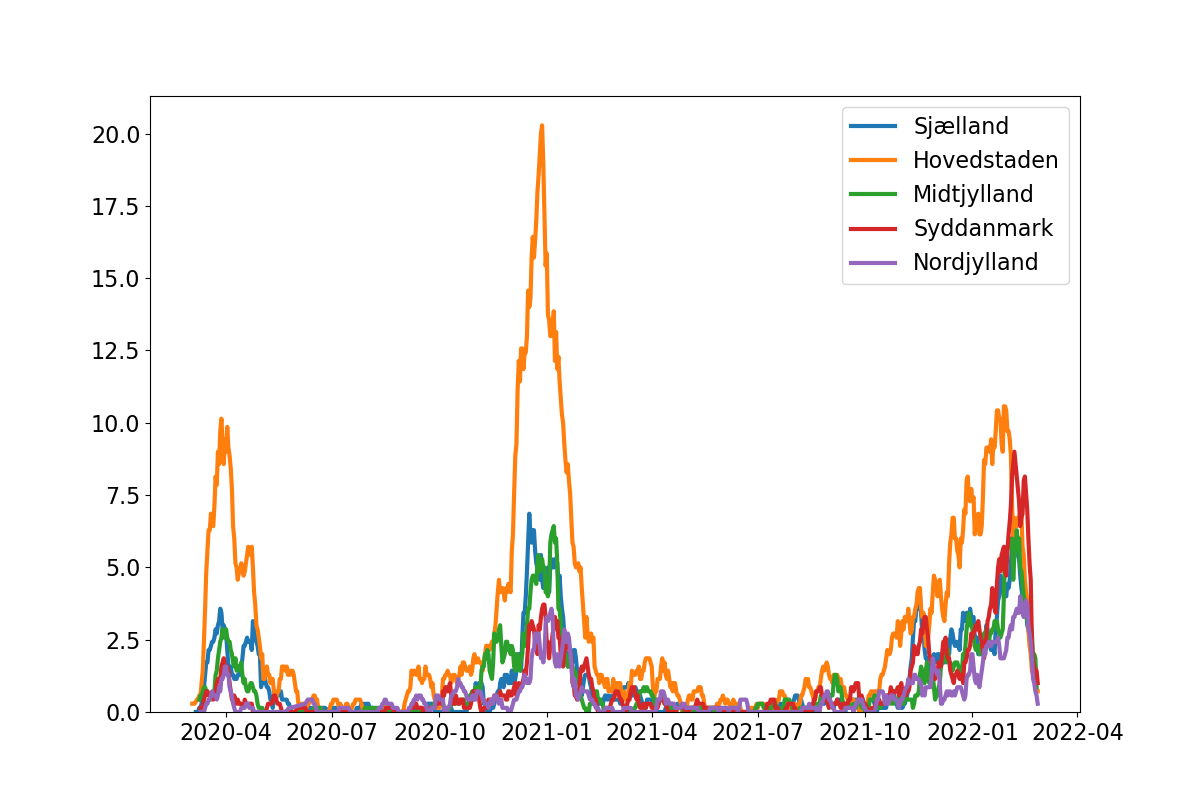

In [6]:
# As a test, plot time-series
df.columns
dfReg = df.groupby(['Region','Prøvetagningsdato']).sum()

plt.figure() 

k = 0
allRegion = df.Region.unique()
for k in range(len(allRegion)):
    curRegion = allRegion[k]
    curdf = dfReg.loc[curRegion]
    curDates = curdf.index

    # plt.plot(curDates,curdf['Døde'],label=curRegion)
    plt.plot(pf.rnTime(curDates),pf.rnMean(curdf['Døde']),label=curRegion)
    # plt.plot(pf.rnTime(curDates),pf.rnMean(curdf['Indlæggelser']),label=curRegion)
    # plt.plot(pf.rnTime(curDates),pf.rnMean(curdf['Bekræftede tilfælde i alt']),label=curRegion)

plt.legend()
plt.ylim(bottom=0)

In [5]:
# Get map-data
gdf = gpd.read_file(rootdir_data+'Region\\Region.shp')

# Only use most recent mapdata
gdf = gdf[gdf.til == np.max(gdf.til.unique())]
gdf

,objectid,navn,enhedid,fra,til,enhedtype,art,SHAPE_Leng,SHAPE_Area,geometry
0,105612.0,Region Hovedstaden,118711.0,2007-01-01,9999-12-31,66.0,Region,7.371152e+05,2.563160e+09,MULTIPOLYGON Z (((893016.809 6147736.924 0.000...
1,105615.0,Region Sjælland,118712.0,2011-11-27,9999-12-31,66.0,Region,2.196684e+06,7.216493e+09,MULTIPOLYGON Z (((727211.919 6095342.754 0.000...
2,105616.0,Region Syddanmark,118713.0,2007-01-01,9999-12-31,66.0,Region,2.436420e+06,1.209603e+10,MULTIPOLYGON Z (((608271.732 6065789.756 0.000...
3,105620.0,Region Midtjylland,118715.0,2011-01-01,9999-12-31,66.0,Region,2.564054e+06,1.299856e+10,MULTIPOLYGON Z (((663400.204 6291476.405 0.000...
8,105617.0,Region Nordjylland,118714.0,2007-01-01,9999-12-31,66.0,Region,1.697705e+06,7.870127e+09,MULTIPOLYGON Z (((619813.130 6343486.648 0.000...


In [83]:
# gdfCurRegion =  gdf.iloc[1]
# x_min, y_min, x_max, y_max = gdfCurRegion.geometry.bounds

# # set sample size
# n = 100
# # generate random data within the bounds
# x = np.random.uniform(x_min, x_max, n)
# y = np.random.uniform(y_min, y_max, n)

# # convert them to a points GeoSeries
# gdf_points = gpd.GeoSeries(gpd.points_from_xy(x, y))
# # # only keep those points within polygons
# # gdf_points = gdf_points[gdf_points.within(gdfCurRegion)]
# gdf_points = gdf_points[gdf_points.within(gdfCurRegion.geometry)]

# fig,ax = plt.subplots()
# gdf.plot(ax=ax,color='k')
# gdf_points.plot(ax=ax)

In [84]:
# # gdf_points[gdf_points.within(gdfCurRegion)]
# gdf_points[gdf_points.within(gdfCurRegion.geometry)]